<a href="https://colab.research.google.com/github/subhan215/deep-learning-assignment/blob/main/Concrete_Strength_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras import layers
from keras import models

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [ ]:
import io

In [ ]:
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['compresive_strength_concrete.csv']))

In [ ]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
data.isna().any().any()

False

In [ ]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
mean = data.mean(axis=0)
data -= mean
std = data.std(axis=0)
data /= std

In [ ]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597,2.644123
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597,1.560663
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340,0.266498
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221,0.313188
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069,0.507732
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.487998,0.564271,-0.092126,0.451190,-1.322363,-0.065861,-0.279597,0.506535
1026,0.392628,-0.856472,0.959602,0.675872,0.702285,-1.993711,0.496651,-0.279597,-0.277627
1027,-1.269472,0.759210,0.850222,0.521336,-0.017520,-1.035561,0.080068,-0.279597,-0.725377
1028,-1.168042,1.307430,-0.846733,-0.279443,0.852942,0.214537,0.191074,-0.279597,-0.182450


In [ ]:
# renaming column name
columns_dict = {'Cement (component 1)(kg in a m^3 mixture)':'Cement',
                'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnace slag',
                'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash',
               'Water  (component 4)(kg in a m^3 mixture)': 'Water',
               'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'Superplasticizer',
                'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate',
               'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'Fine Aggregate',
                'Age (day)': 'Age',
               'Concrete compressive strength(MPa, megapascals) ': 'CC_Strength'}
data.rename(columns=columns_dict, inplace = True)


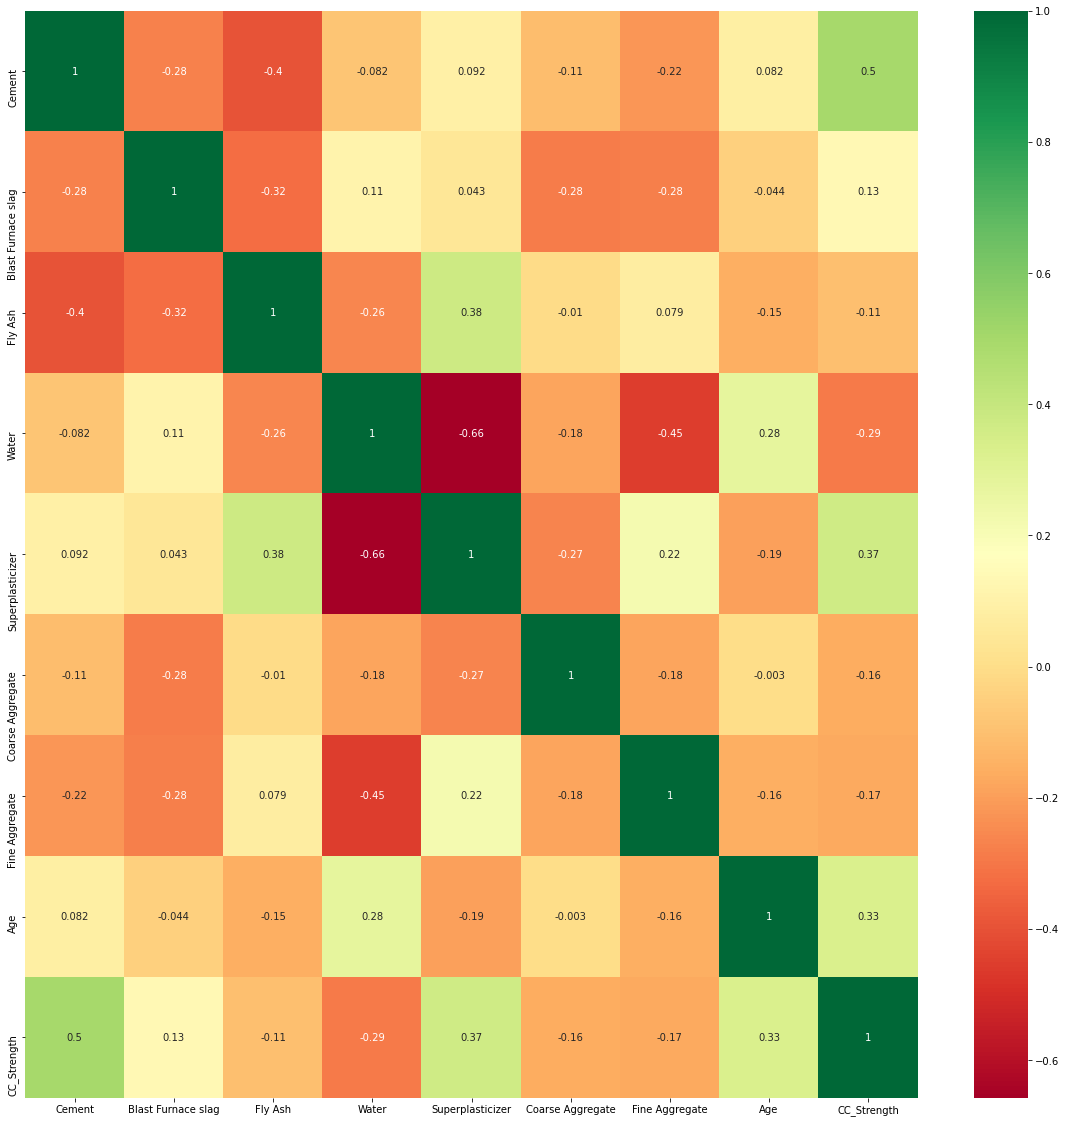

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
newdata = data[['Cement', 'Superplasticizer' ,'Age' ,'CC_Strength']]

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(newdata, test_size = 0.30)

In [ ]:
print(train.shape)
print(test.shape)

(721, 4)
(309, 4)


In [ ]:
train_labels = train.pop("CC_Strength")

In [ ]:
train_labels

985   -0.120794
857   -0.150724
353    1.405627
861    0.086320
979    0.624458
         ...   
470    0.259314
977    0.313188
57    -1.597532
939   -0.185443
387    0.909989
Name: CC_Strength, Length: 721, dtype: float64

In [ ]:
test_labels = test.pop("CC_Strength")

In [ ]:
test_labels

747   -0.584108
357    1.855771
786   -0.261465
46    -1.243163
391    1.187139
         ...   
734    0.289843
890   -1.632849
976    0.003115
641   -1.382037
666   -1.378446
Name: CC_Strength, Length: 309, dtype: float64

In [ ]:
#Validatioin data split
vaildation_data = train[:144]
validation_labels = train_labels[:144]

train = train[144:]
train_labels = train_labels[144:]

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape =(train.shape[1],)))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [ ]:
all_mae = []
model = build_model()
model.fit(train, train_labels, epochs=100, batch_size=1 , verbose=0)
val_mse, val_mae = model.evaluate(vaildation_data, validation_labels, verbose=0)
all_mae.append(val_mae)    


In [ ]:
val_mae

0.40477055311203003

In [ ]:
 mae, mse = model.evaluate(test, test_labels, verbose=0)
print(f'Testing set mean Abs error: {round(mae, 3)}')

Testing set mean Abs error: 0.236


In [ ]:
# make price predictions on test set
import matplotlib.pyplot as plt
test_predictions = model.predict(test).flatten()

test_predictions

array([-0.3420585 ,  1.1263982 , -0.2530775 , -1.2122073 ,  1.0809449 ,
       -0.52028424, -0.6228897 , -0.94799984, -0.5440965 ,  0.6874962 ,
       -0.50107884,  0.29393488, -0.87849116,  0.36127722, -0.5416035 ,
        0.40663713, -0.5279997 , -0.27544457,  0.23679824, -1.4075011 ,
        0.5695221 ,  1.0868455 ,  0.06845258, -0.52022874,  0.02922012,
        2.1392736 , -1.4153458 ,  0.7255221 ,  0.6371317 , -0.5165271 ,
       -0.62015295, -1.5908964 , -1.3896352 ,  0.14008431,  0.9915281 ,
        0.81574965, -1.4120911 , -1.5101274 , -0.4895333 , -0.88327724,
       -1.03993   , -0.8247052 , -0.9120481 , -0.7575933 , -0.52022874,
       -0.88323176, -1.392013  ,  0.568245  , -0.2741264 , -1.3819575 ,
        0.01115614,  0.5403549 , -0.484219  , -0.538845  ,  0.29891008,
        1.0868455 , -0.7859022 , -0.35477257,  0.5301664 , -1.5768102 ,
       -0.9146209 ,  0.40478414, -0.63691235,  0.8828029 ,  0.62545323,
        0.42215544,  0.6402051 , -1.38512   ,  0.8460184 , -0.84